# Text-based analysis of news articles

#  Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import os
import math
import time

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

# Below libraries are for text processing using NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances

# Loading Data

Initial steps of the project, which involve cleaning and exploring the dataset. We discuss the tasks performed, such as loading the dataset and removing duplicates and irrelevant data. Additionally, we provide insights from the descriptive statistics and visualizations used to explore the dataset.

In [2]:
# Read the JSON file into a pandas DataFrame
news_articles = pd.read_json("C:/Users/DELL/Desktop/TextBasedAnalysis/Project/News_Category_Dataset_v3.json", lines = True)

In [3]:
# Display information about the DataFrame
news_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


# Displaying DataFrame Head

In [4]:
# Display the first few rows of the DataFrame
news_articles.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

# Displaying DataFrame Columns

In [5]:
# Retrieve the column names of the DataFrame
news_articles.columns 

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

# Displaying DataFrame Data Types

In [6]:
# Retrieve the data types of columns in the DataFrame
news_articles.dtypes

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

# Displaying DataFrame Information 

In [7]:
# Generate descriptive statistics for numerical columns in the DataFrame
news_articles.describe() 

date
count                         209527
mean   2015-04-30 00:44:14.344308736
min              2012-01-28 00:00:00
25%              2013-08-10 00:00:00
50%              2015-03-16 00:00:00
75%              2016-11-01 00:00:00
max              2022-09-23 00:00:00

# Calculating and Displaying DataFrame Length

In [8]:
# Calculate the length of the DataFrame
length = len(news_articles)
# Print the length of the DataFrame
print("Length of DataFrame:", length)

Length of DataFrame: 209527


# Displaying Descriptive Statistics for Categorical Columns 

In [9]:
# Generate descriptive statistics for object (categorical) columns in the DataFrame
news_articles.describe(include='O') 

link        headline  \
count                                              209527          209527   
unique                                             209486          207996   
top     https://www.huffingtonpost.comhttps://www.wash...  Sunday Roundup   
freq                                                    2              90   

        category short_description authors  
count     209527            209527  209527  
unique        42            187022   29169  
top     POLITICS                            
freq       35602             19712   37418

# Checking and Summing Missing Values in DataFrame

In [10]:
# Check for missing values and calculate the sum of missing values for each column
news_articles.isna().sum() 

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

#  Data Preprocessing

# Fetching only the articles from 2018

In [11]:
# Filter articles by date using regex to match the format 'YYYY-MM-DD'
news_articles['date'] = pd.to_datetime(news_articles['date']) 
# Convert date column to datetime type
news_articles = news_articles[news_articles['date'].dt.year >= 2018]

In [12]:
# Print the shape of the DataFrame
news_articles.shape

(17257, 6)

In [13]:
import re

#  Removing all the short headline articles

In [15]:
# Remove articles with short headlines using regex to count words
news_articles = news_articles[news_articles['headline'].apply(lambda x: len(re.findall(r'\b\w+\b', x)) > 5)]
# Print the total number of articles after removal of headlines with short titles
print("Total number of articles after removal of headlines with short titles:", news_articles.shape[0])

Total number of articles after removal of headlines with short titles: 17202


# Checking and removing all the duplicates

In [16]:
# Remove duplicate articles based on headline using regex
news_articles['headline'] = news_articles['headline'].str.lower()  # Convert headline to lowercase for case-insensitive matching
# Remove duplicate articles based on headline using regex
news_articles = news_articles[~news_articles.duplicated('headline', keep='first')]
# Print the total number of articles after removing duplicates
print("Total number of articles after removing duplicates:", news_articles.shape[0])

Total number of articles after removing duplicates: 17144


# Checking for missing values

In [17]:
news_articles.isna().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

# Data Exploration

# Basic statistics - Number of articles, authors, categories

In [18]:
# Print the total number of articles in the DataFrame
print("Total number of articles : ", news_articles.shape[0])
# Print the total number of unique authors in the DataFrame
print("Total number of authors : ", news_articles["authors"].nunique())
# Print the total number of unique categories in the DataFrame
print("Total number of unqiue categories : ", news_articles["category"].nunique())

Total number of articles :  17144
Total number of authors :  2261
Total number of unqiue categories :  36


# Distribution of articles category-wise

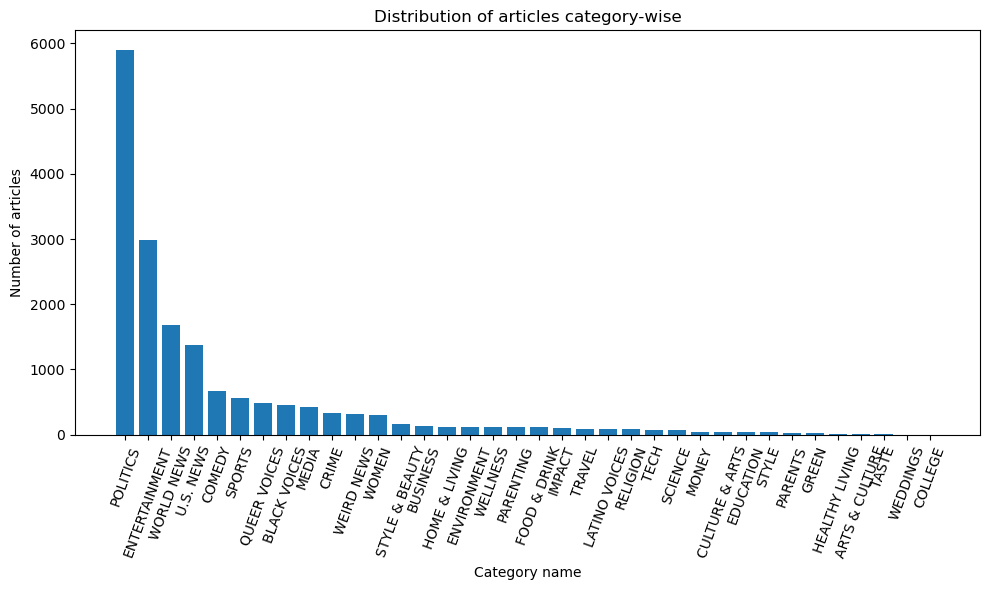

In [19]:
import matplotlib.pyplot as plt
# Compute category counts
category_counts = news_articles["category"].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if necessary
plt.bar(category_counts.index, category_counts.values)
# Add title and labels
plt.title('Distribution of articles category-wise')
plt.xlabel('Category name')
plt.ylabel('Number of articles')
# Rotate category names for better readability
plt.xticks(rotation=70) 
plt.tight_layout()  # Adjust layout to prevent clipping of axis labels
# Show the plot
plt.show()


# Number of articles per month

In [20]:
# Resample the DataFrame to get the count of articles per month
news_articles_per_month = news_articles.resample('m',on = 'date')['headline'].count()
# Display the count of articles per month
news_articles_per_month

date
2018-01-31    2070
2018-02-28    1699
2018-03-31    1781
2018-04-30    1582
2018-05-31    1394
2018-06-30     136
2018-07-31     155
2018-08-31     125
2018-09-30     157
2018-10-31     182
2018-11-30     175
2018-12-31     181
2019-01-31     181
2019-02-28     168
2019-03-31     179
2019-04-30     147
2019-05-31     152
2019-06-30     153
2019-07-31     158
2019-08-31     162
2019-09-30     164
2019-10-31     183
2019-11-30     174
2019-12-31     181
2020-01-31     154
2020-02-29     132
2020-03-31     162
2020-04-30     170
2020-05-31     179
2020-06-30     176
2020-07-31     185
2020-08-31     180
2020-09-30     172
2020-10-31     176
2020-11-30     178
2020-12-31     181
2021-01-31     183
2021-02-28     141
2021-03-31     165
2021-04-30     176
2021-05-31     184
2021-06-30     176
2021-07-31     180
2021-08-31     175
2021-09-30     169
2021-10-31     174
2021-11-30     170
2021-12-31     170
2022-01-31     150
2022-02-28     152
2022-03-31     174
2022-04-30     162
2022-05

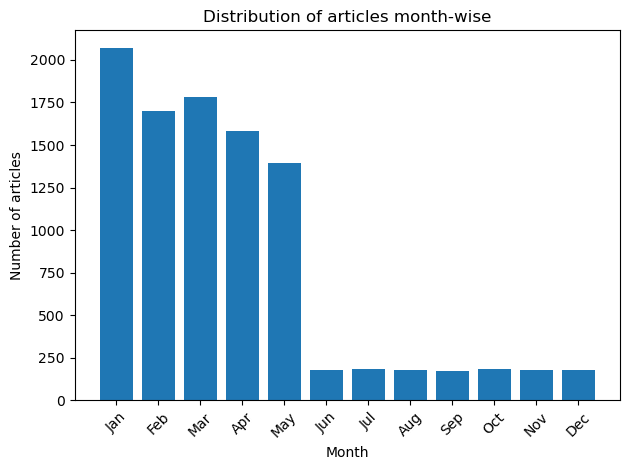

In [21]:
# Create a bar plot for articles per month
plt.bar(news_articles_per_month.index.strftime("%b"), news_articles_per_month)
plt.title('Distribution of articles month-wise')
plt.xlabel('Month')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)  # Rotate month names for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of axis labels
plt.show()

# PDF for the length of headlines

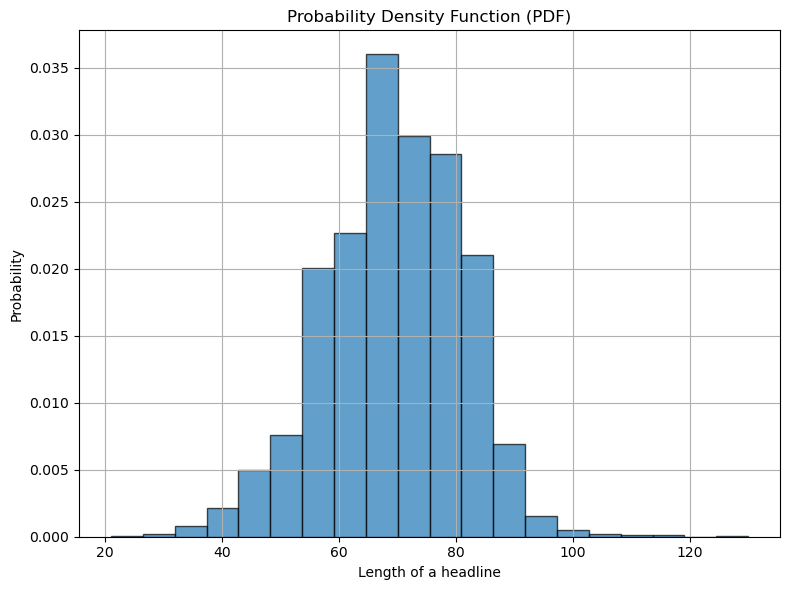

In [22]:
plt.figure(figsize=(8, 6))  # Adjust the size of the plot if necessary
plt.hist(news_articles['headline'].str.len(), bins=20, density=True, edgecolor='k', alpha=0.7)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Length of a headline')
plt.ylabel('Probability')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of axis labels
plt.show()

# Text Processing
Tokenization, stopwords removal using NLTK, creating a text preprocessing pipeline
Tasks involved, such as tokenization and stopwords removal using NLTK, as well as the creation of a text preprocessing pipeline. Additionally, we present insights from the word frequency analysis and visualization

# Importing Regex Package 

In [24]:
# Importing Regex Package
import regex as re
# Defining a Function to Pull Words
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Tokenizing Given Text 

In [26]:
#Toknizing the Given Text
testtext = "23 Of The Funniest Tweets About Cats And Dogs"
testtokens = tokenize(testtext)
print(testtokens)

['Of', 'The', 'Funniest', 'Tweets', 'About', 'Cats', 'And', 'Dogs']


# Importing NLTK Package 

In [27]:
# Importing nltk Package
import nltk

In [23]:
# Reset the index of the DataFrame
news_articles.index = range(news_articles.shape[0])

In [28]:
# Adding a new column containing both day of the week and month, it will be required later while recommending based on day of the week and month
news_articles["day and month"] = news_articles["date"].dt.strftime("%a") + "_" + news_articles["date"].dt.strftime("%b")

In [29]:
news_articles_temp = news_articles.copy()

# Downloading Stop Words List

In [30]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if you haven't already
nltk.download('stopwords')

# Assuming 'news_articles' is your DataFrame containing articles and 'headline' is the column containing headlines

# Remove stopwords from headlines
stop_words = set(stopwords.words('english'))
news_articles['headline'] = news_articles['headline'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Print the first few headlines after removing stopwords
print(news_articles['headline'].head())

0    4 million americans roll sleeves omicron-targe...
1    american airlines flyer charged, banned life p...
2      23 funniest tweets cats dogs week (sept. 17-23)
3           funniest tweets parents week (sept. 17-23)
4    woman called cops black bird-watcher loses law...
Name: headline, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Defining a Function to Remove Stop Words

In [32]:
from nltk.corpus import stopwords

# Load stopwords for the English language
stopwords_list = stopwords.words('english')

# Define the function to remove stopwords
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords_list]

# Just testing it
cleantokens = remove_stop(testtokens)
print(cleantokens)

['Funniest', 'Tweets', 'Cats', 'Dogs']


# Creating a Text Processing Pipeline

In [33]:
# Creating a Pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Defining a Function to Run the Pipeline
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

# Applying Text Processing Pipeline to DataFrame Column

In [35]:
# Running the Pipeline
news_articles['tokens'] = news_articles['category'].apply(prepare, pipeline=pipeline)

# Creating a New Column for Number of Tokens

In [37]:
#creating a New Column for the Number of Tokens
news_articles['num_tokens'] = news_articles['tokens'].map(len)
news_articles.tail()

link  \
17139  https://www.huffingtonpost.com/entry/don-lemon...   
17140  https://www.huffingtonpost.com/entry/halle-ber...   
17141  https://www.huffingtonpost.com/entry/barack-ob...   
17142  https://www.huffingtonpost.com/entry/legal-mar...   
17143  https://www.huffingtonpost.com/entry/hollywood...   

                                                headline       category  \
17139  remember lemon's drunken nye rant last year? t...          MEDIA   
17140      halle berry thanks middle finger getting 2017  ENTERTAINMENT   
17141      barack obama shares favorite books songs 2017       POLITICS   
17142        buy legal recreational marijuana california       POLITICS   
17143  hollywood heroines launch initiative fight sex...          WOMEN   

                                       short_description          authors  \
17139  The CNN host introduced the audience to his sp...  Rebecca Shapiro   
17140                       "Always standing up for me!"       Ron Dicker   
17141  The former president shared the "songs that go...  Rebecca Shapiro   
17142  The first state to legalize medical cannabis b...      Matt Ferner   
17143  Kerry Washington, Reese Witherspoon and Americ...    Hayley Miller   

            date day and month           tokens  num_tokens  
17139 2018-01-01       Mon_Jan          [media]           1  
17140 2018-01-01       Mon_Jan  [entertainment]           1  
17141 2018-01-01       Mon_Jan       [politics]           1  
17142 2018-01-01       Mon_Jan       [politics]           1  
17143 2018-01-01       Mon_Jan          [women]           1

# Importing Counter Function

In [38]:
# importing a function Counter
from collections import Counter

tokens = tokenize("remember lemon's drunken nye rant last year?")
testcount= Counter(tokens)
print(testcount)

Counter({'remember': 1, 'lemon': 1, 's': 1, 'drunken': 1, 'nye': 1, 'rant': 1, 'last': 1, 'year': 1})


# Counting Token Occurrences Across DataFrame Column

In [39]:
# Printing the 5 Words Repeated the Most
counter = Counter()
news_articles['tokens'].map(counter.update)
print(counter.most_common(5))

[('politics', 5906), ('news', 3368), ('entertainment', 2987), ('world', 1680), ('u', 1376)]


# Creating a New DataFrame

In [40]:
# Creating a New Data Frame for Frequency Analysis 
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

# Sorting DataFrame

In [41]:
# Sorting the freq_df based on Frequency
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

freq
token              
politics       5906
news           3368
entertainment  2987
world          1680
u              1376
voices         1029
comedy          668
sports          557
queer           484
black           461

# Printing Statistical Data 

In [42]:
# Printing the Statistical Data of Frequency
freq_df.describe()

freq
count    40.000000
mean    550.350000
std    1140.470518
min       1.000000
25%      64.750000
50%     119.000000
75%     428.750000
max    5906.000000

# Printing Statistical Data

[Text(0.5, 0, 'value'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

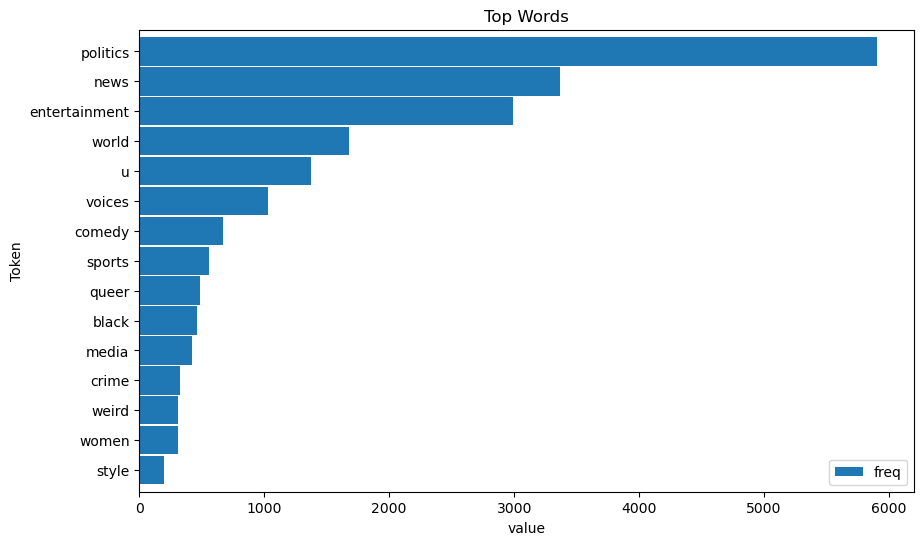

In [43]:
# Plotting a bar graph for most frequent words 
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(10,6))
ax.invert_yaxis()
ax.set(xlabel='value', ylabel='Token', title='Top Words')

# Creating Word Cloud for 'category' Column

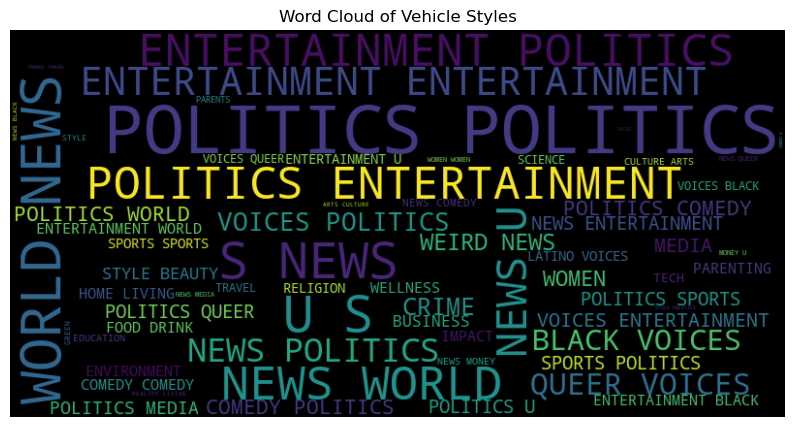

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(news_articles['category'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Vehicle Styles')
plt.show()


# Stopword Removal and Non-Alphanumeric Character Cleaning

In [47]:
stop_words = set(stopwords.words('english'))
for i in range(len(news_articles_temp["headline"])):
    string = ""
    for word in news_articles_temp["headline"][i].split():
        word = ("".join(e for e in word if e.isalnum()))
        word = word.lower()
        if not word in stop_words:
          string += word + " "  
    if(i%1000==0):
      print(i)           # To track number of records processed
    news_articles_temp.at[i,"headline"] = string.strip()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


# Sentiment Analysis

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Functions for Subjectivity and Polarity Analysis

In [49]:
# Assuming 'news_articles' is your DataFrame containing news articles with the provided columns

# Define a function to get the subjectivity of the text
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Define a function to get the polarity of the text
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Add new columns for subjectivity and polarity to the DataFrame
news_articles['Subjectivity'] = news_articles['short_description'].apply(getSubjectivity)
news_articles['Polarity'] = news_articles['short_description'].apply(getPolarity)
news_articles.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  4 million americans roll sleeves omicron-targe...  U.S. NEWS   
1  american airlines flyer charged, banned life p...  U.S. NEWS   
2    23 funniest tweets cats dogs week (sept. 17-23)     COMEDY   
3         funniest tweets parents week (sept. 17-23)  PARENTING   
4  woman called cops black bird-watcher loses law...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date day and month       tokens  num_tokens  Subjectivity  Polarity  
0 2022-09-23       Fri_Sep    [u, news]           2      0.377273  0.118182  
1 2022-09-23       Fri_Sep    [u, news]           2      0.000000  0.000000  
2 2022-09-23       Fri_Sep     [comedy]           1      0.000000  0.000000  
3 2022-09-23       Fri_Sep  [parenting]           1      0.000000  0.000000  
4 2022-09-22       Thu_Sep    [u, news]           2      0.550000 -0.233333

# Function to Categorize Polarity Scores

In [50]:
# Define a function to categorize polarity scores into different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the categorization function to the 'Polarity' column and store the results in a new column 'Insight'    
news_articles["Insight"] = news_articles["Polarity"].apply(getInsight)
# Display the first 30 rows of the dataframe with the new 'Insight' column
news_articles.head(30)

link  \
0   https://www.huffpost.com/entry/covid-boosters-...   
1   https://www.huffpost.com/entry/american-airlin...   
2   https://www.huffpost.com/entry/funniest-tweets...   
3   https://www.huffpost.com/entry/funniest-parent...   
4   https://www.huffpost.com/entry/amy-cooper-lose...   
5   https://www.huffpost.com/entry/belk-worker-fou...   
6   https://www.huffpost.com/entry/reporter-gets-a...   
7   https://www.huffpost.com/entry/puerto-rico-wat...   
8   https://www.huffpost.com/entry/mija-documentar...   
9   https://www.huffpost.com/entry/biden-un-russia...   
10  https://www.huffpost.com/entry/bc-soc-wcup-cap...   
11  https://www.huffpost.com/entry/man-sets-fire-p...   
12  https://www.huffpost.com/entry/fiona-threatens...   
13  https://www.huffpost.com/entry/twitch-streamer...   
14  https://www.huffpost.com/entry/virginia-thomas...   
15  https://www.huffpost.com/entry/valery-polyakov...   
16  https://www.huffpost.com/entry/hulu-reboot-sho...   
17  https://www.huffpost.com/entry/dodgers-basebal...   
18  https://www.huffpost.com/entry/russian-control...   
19  https://www.huffpost.com/entry/hurricane-fiona...   
20  https://www.huffpost.com/entry/golden-globes-r...   
21  https://www.huffpost.com/entry/biden-us-forces...   
22  https://www.huffpost.com/entry/hurricane-fiona...   
23  https://www.huffpost.com/entry/national-champi...   
24  https://www.huffpost.com/entry/ukraine-festiva...   
25  https://www.huffpost.com/entry/mark-frerichs-r...   
26  https://www.huffpost.com/entry/2022-wnba-final...   
27  https://www.huffpost.com/entry/queen-elizabeth...   
28  https://www.huffpost.com/entry/james-cameron-f...   
29  https://www.huffpost.com/entry/french-spiderma...   

                                             headline        category  \
0   4 million americans roll sleeves omicron-targe...       U.S. NEWS   
1   american airlines flyer charged, banned life p...       U.S. NEWS   
2     23 funniest tweets cats dogs week (sept. 17-23)          COMEDY   
3          funniest tweets parents week (sept. 17-23)       PARENTING   
4   woman called cops black bird-watcher loses law...       U.S. NEWS   
5   cleaner dead belk bathroom 4 days body found: ...       U.S. NEWS   
6   reporter gets adorable surprise boyfriend live tv       U.S. NEWS   
7   puerto ricans desperate water hurricane fiona’...      WORLD NEWS   
8   new documentary captures complexity child immi...  CULTURE & ARTS   
9    biden un call russian war affront body's charter      WORLD NEWS   
10  world cup captains want wear rainbow armbands ...      WORLD NEWS   
11  man sets fire apparent protest funeral japan's...      WORLD NEWS   
12  fiona threatens become category 4 storm headed...      WORLD NEWS   
13  twitch bans gambling sites streamer scams folk...            TECH   
14      virginia thomas agrees interview jan. 6 panel       U.S. NEWS   
15  russian cosmonaut valery polyakov broke record...      WORLD NEWS   
16  'reboot' clever navel-gazey look inside tv reb...  CULTURE & ARTS   
17  maury wills, base-stealing shortstop dodgers, ...          SPORTS   
18  4 russian-controlled ukrainian regions schedul...      WORLD NEWS   
19  fiona barrels toward turks caicos islands cate...      WORLD NEWS   
20   golden globes returning nbc january year off-air   ENTERTAINMENT   
21  biden says u.s. forces would defend taiwan chi...        POLITICS   
22  hurricane fiona bears dominican republic pound...      WORLD NEWS   
23               one dead plane crashes reno air race       U.S. NEWS   
24  ‘beautiful sad time’: ukrainian cultural festi...        POLITICS   
25  family american held afghanistan says freed ta...       U.S. NEWS   
26  las vegas aces win first wnba title, chelsea g...          SPORTS   
27      world leaders pay respects queen elizabeth ii      WORLD NEWS   
28  james cameron says 'clashed' studio 'avatar' r...   ENTERTAINMENT   
29  'french spider-man' celebrates 60th birthday m...      WEIRD NEWS   

                 

# Visualizing the Data

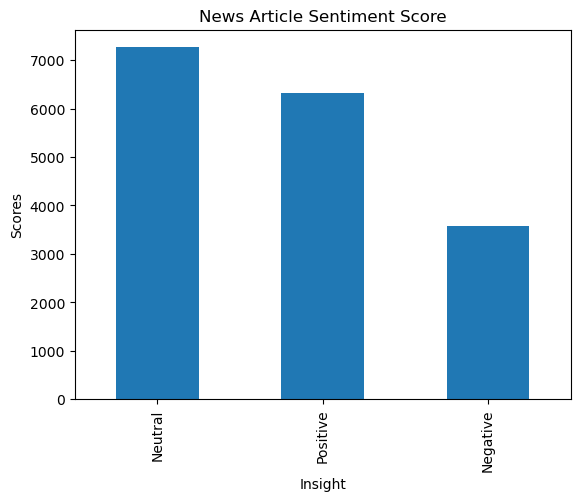

In [51]:
# Plot the sentiment score counts for news articles
plt.title("News Article Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
news_articles["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

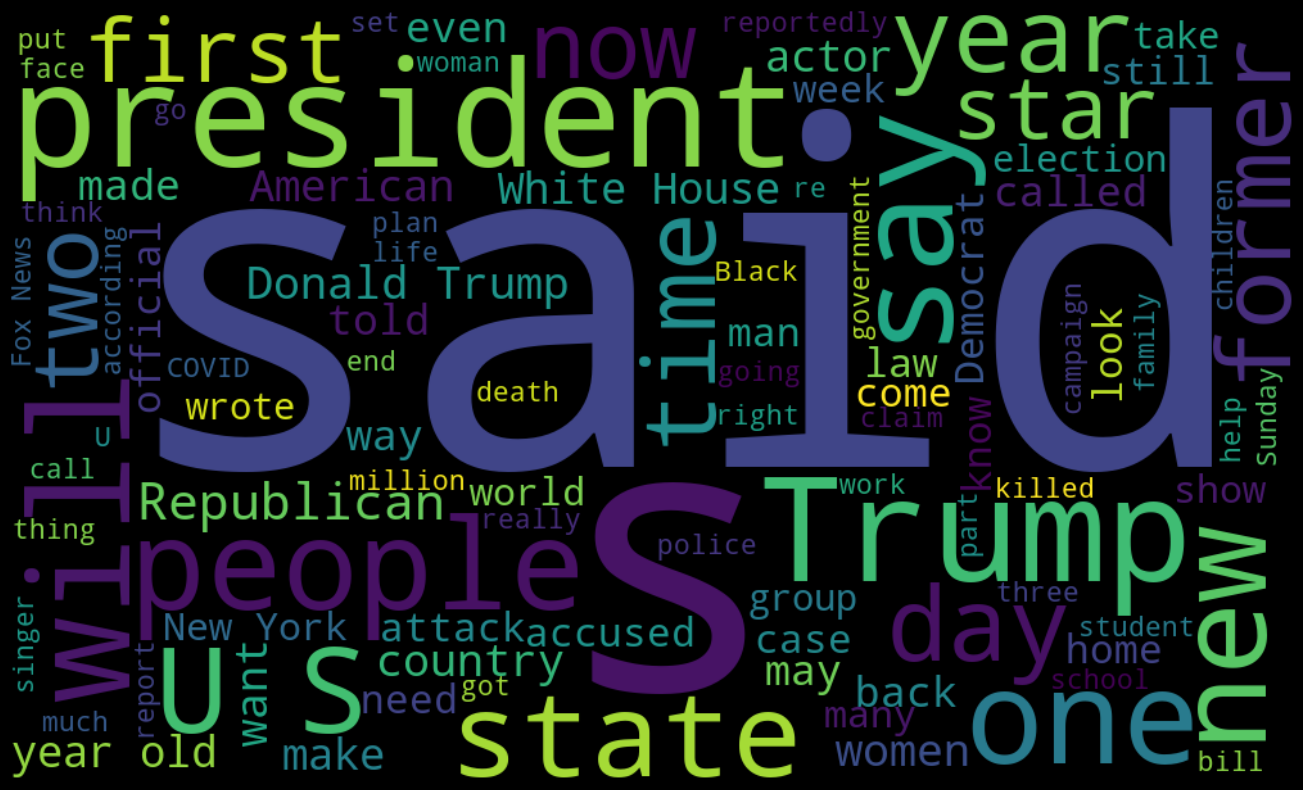

In [53]:
# Concatenate all short descriptions into a single string
text = ' '.join([desc for desc in news_articles['short_description']])

# Generate word cloud 
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axis
plt.show()

# Sentiment Analysis Setup

In [54]:
# Import necessary libraries
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

# Download NLTK resources if not already downloaded
nltk.download('opinion_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Sentiment Analysis Function

In [55]:
# Load the opinion lexicon dataset from NLTK
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [56]:
# Define a function to calculate the Bing Liu score for a given text
def calculate_bing_liu_score(text):
    # Tokenize the text into individual words
    words = word_tokenize(text.lower())
    
    # Initialize the sentiment score
    sentiment_score = 0
    
    # Iterate over each word in the text
    for word in words:
        # Check if the word is in the positive lexicon
        if word in positive_words:
            sentiment_score += 1
        # Check if the word is in the negative lexicon
        elif word in negative_words:
            sentiment_score -= 1
    
    return sentiment_score

# Data Preprocessing and Sentiment Analysis

In [57]:
# Fill missing values in the 'short_description' column with an empty string
news_articles['short_description'].fillna('', inplace=True)

# Apply the Bing Liu score calculation function to each text in the 'short_description' column
news_articles['Bing_Liu_Score'] = news_articles['short_description'].apply(calculate_bing_liu_score)

In [58]:
# Display the DataFrame with the calculated Bing Liu scores
print(news_articles[['short_description', 'Bing_Liu_Score']])

                                       short_description  Bing_Liu_Score
0      Health experts said it is too early to predict...              -1
1      He was subdued by passengers and crew when he ...              -2
2      "Until you have a dog you don't understand wha...               0
3      "Accidentally put grown-up toothpaste on my to...               1
4      Amy Cooper accused investment firm Franklin Te...              -2
...                                                  ...             ...
17139  The CNN host introduced the audience to his sp...               0
17140                       "Always standing up for me!"               0
17141  The former president shared the "songs that go...               0
17142  The first state to legalize medical cannabis b...               0
17143  Kerry Washington, Reese Witherspoon and Americ...               0

[17144 rows x 2 columns]


In [59]:
# Displaying the first 10 rows of selected columns ( 'short_description', 'Bing_Liu_Score')
news_articles[["short_description", 'Bing_Liu_Score']].head(10)

short_description  Bing_Liu_Score
0  Health experts said it is too early to predict...              -1
1  He was subdued by passengers and crew when he ...              -2
2  "Until you have a dog you don't understand wha...               0
3  "Accidentally put grown-up toothpaste on my to...               1
4  Amy Cooper accused investment firm Franklin Te...              -2
5  The 63-year-old woman was seen working at the ...              -1
6  "Who's that behind you?" an anchor for New Yor...               0
7  More than half a million people remained witho...               0
8  In "Mija," director Isabel Castro combined mus...               0
9  White House officials say the crux of the pres...              -2

# DISPLAYING FIRST 400 CHARACTERS

In [61]:
#Displaying 400 characters of short_description from specific rows in the DataFrame using iloc
print(repr(news_articles.iloc[2666]["short_description"][0:400]))
print(repr(news_articles.iloc[4726]["short_description"][0:400]))

'Even after Israel agreed to a cease-fire, Palestinians in the United States worry about the long-term impact on their families.'
'"We now have a serious problem,” Lassen County\'s public health officer said of the new coronavirus outbreak.'


# SPLITTING TEXT

In [62]:
import re
# Splitting short_description into paragraphs
news_articles["paragraphs"] = news_articles["short_description"].map(lambda text: re.split('\.\s*\n', text))
# Calculating the number of paragraphs in each short_description
news_articles["number_of_paragraphs"] = news_articles["paragraphs"].map(len)

# TF-IDF VECTORISATION OF TEXT DATA USING SCIKIT-LEARN

In [64]:
#TF-IDF vectorization on the text data in the DataFrame using scikit-learn's TfidfVectorizer.
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words to a list
stopwords_list = list(stopwords)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(news_articles['short_description'])
tfidf_text_vectors.shape

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(17144, 5513)

# FLATTEN PARAGRAPHS 

In [110]:
# flatten the paragraphs keeping the category
paragraph_news_articles= pd.DataFrame([{ "short_description": paragraph, "category": category } 
                               for paragraphs, category in zip(news_articles["paragraphs"], news_articles["category"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_news_articles.head(10)

short_description        category
0  Health experts said it is too early to predict...       U.S. NEWS
1  He was subdued by passengers and crew when he ...       U.S. NEWS
2  "Until you have a dog you don't understand wha...          COMEDY
3  "Accidentally put grown-up toothpaste on my to...       PARENTING
4  Amy Cooper accused investment firm Franklin Te...       U.S. NEWS
5  The 63-year-old woman was seen working at the ...       U.S. NEWS
6  "Who's that behind you?" an anchor for New Yor...       U.S. NEWS
7  More than half a million people remained witho...      WORLD NEWS
8  In "Mija," director Isabel Castro combined mus...  CULTURE & ARTS
9  White House officials say the crux of the pres...      WORLD NEWS

# TF-IDF VECTORISATION OF PARAGRAPHS USING SCIKIT-LEARN

In [90]:
# Convert spaCy stop words to a list
stopwords_list = list(stopwords)

# Initialize TF-IDF vectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the TF-IDF vectorizer on the 'short_description' column
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(news_articles["short_description"])
tfidf_para_vectors.shape

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(17144, 5513)

# TOPIC MODELING WITH NON-NEGATIVE MATRIX FACTORISATION (NMF)

In [91]:
# Imports NMF from sklearn.decomposition, initializes an NMF model
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

# DISPLAYING TOP WORDS IN EACH TOPIC

In [92]:
#This function takes an NMF model, the list of features (words), and an optional parameter specifying the number of top words to display for each topic.
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  said (11.82)
  officials (0.53)
  ve (0.47)
  police (0.46)
  senator (0.40)

Topic 01
  trump (11.22)
  donald (4.13)
  campaign (1.02)
  administration (0.97)
  election (0.56)

Topic 02
  new (10.01)
  york (3.22)
  times (1.13)
  city (1.04)
  jersey (0.55)

Topic 03
  president (12.17)
  vice (1.40)
  biden (1.05)
  joe (0.90)
  called (0.50)

Topic 04
  host (10.42)
  late (6.11)
  news (5.17)
  fox (4.40)
  night (1.96)

Topic 05
  year (9.73)
  old (6.19)
  police (1.09)
  man (0.81)
  18 (0.53)

Topic 06
  people (9.67)
  killed (1.24)
  injured (0.61)
  police (0.55)
  000 (0.50)

Topic 07
  house (9.31)
  white (8.13)
  secretary (1.12)
  press (1.09)
  speaker (1.07)

Topic 08
  like (16.64)
  looks (1.88)
  look (1.58)
  going (1.13)
  want (0.96)

Topic 09
  time (1.64)
  don (1.29)
  star (1.01)
  know (0.96)
  says (0.78)


# TOPIC MODELING USING NON-NEGATIVE MATRIX

In [93]:
# Fit the NMF model to TF-IDF vectors of paragraph data
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  said (11.82)
  officials (0.53)
  ve (0.47)
  police (0.46)
  senator (0.40)

Topic 01
  trump (11.22)
  donald (4.13)
  campaign (1.02)
  administration (0.97)
  election (0.56)

Topic 02
  new (10.01)
  york (3.22)
  times (1.13)
  city (1.04)
  jersey (0.55)

Topic 03
  president (12.17)
  vice (1.40)
  biden (1.05)
  joe (0.90)
  called (0.50)

Topic 04
  host (10.42)
  late (6.11)
  news (5.17)
  fox (4.40)
  night (1.96)

Topic 05
  year (9.73)
  old (6.19)
  police (1.09)
  man (0.81)
  18 (0.53)

Topic 06
  people (9.67)
  killed (1.24)
  injured (0.61)
  police (0.55)
  000 (0.50)

Topic 07
  house (9.31)
  white (8.13)
  secretary (1.12)
  press (1.09)
  speaker (1.07)

Topic 08
  like (16.64)
  looks (1.88)
  look (1.58)
  going (1.13)
  want (0.96)

Topic 09
  time (1.64)
  don (1.29)
  star (1.01)
  know (0.96)
  says (0.78)


# CALCULATING PERCENTAGE ACROSS DOCUMENTS

In [94]:
# calculates the percentage distribution of topics across documents
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 8.33932384, 12.04908969,  8.2502419 ,  9.83620825,  7.12428901,
        8.15867579, 10.48921284,  7.33855988,  5.96550314, 22.44889566])

# CALCULATING TOPIC DISTRIBUTION PERCENTAGE ACROSS PARAGRAPHS

In [95]:
#calculates the percentage distribution of topics across paragraphs.
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 8.33932384, 12.04908969,  8.2502419 ,  9.83620825,  7.12428901,
        8.15867579, 10.48921284,  7.33855988,  5.96550314, 22.44889566])

# COUNT VECTORIZATION OF PARAGRAPHS USING SCIKIT-LEARN 

In [96]:
#converts spaCy stop words to a list and initializes a CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_news_articles["short_description"])
count_para_vectors.shape

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(17144, 5513)

# TOPIC MODELING FOR PARAGRAPHS USING LDA

In [97]:
#fits the LDA model to the count vectors of paragraph data
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

# DISPLAYING TOP WORDS FOR EACH TOPIC IN LDA MODEL

In [98]:
#takes the LDA model (model), the vectorizer used to generate features
def display_topics(model, vectorizer, no_top_words=5):
    feature_names = vectorizer.get_feature_names_out()
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

display_topics(lda_para_model, count_para_vectorizer)


Topic 00
  said (2.95)
  state (2.00)
  president (1.47)
  trump (1.32)
  like (1.05)

Topic 01
  new (4.82)
  york (1.48)
  times (0.86)
  week (0.83)
  city (0.83)

Topic 02
  said (1.68)
  singer (1.30)
  star (1.15)
  wrote (0.98)
  video (0.96)

Topic 03
  people (2.66)
  country (0.65)
  film (0.54)
  new (0.53)
  food (0.51)

Topic 04
  news (2.39)
  said (1.91)
  19 (1.69)
  covid (1.63)
  fox (1.37)

Topic 05
  said (1.33)
  president (0.63)
  trump (0.60)
  second (0.57)
  host (0.49)

Topic 06
  trump (6.37)
  president (3.47)
  house (2.41)
  donald (1.62)
  said (1.51)

Topic 07
  said (2.39)
  women (1.50)
  host (1.30)
  sexual (1.03)
  late (1.00)

Topic 08
  time (0.98)
  president (0.78)
  rights (0.66)
  american (0.66)
  political (0.64)

Topic 09
  year (2.81)
  old (2.21)
  said (1.90)
  police (1.35)
  years (1.23)


# CALCULATING TOPIC DISTRIBUTION

In [99]:
#calculates the percentage distribution of topics across paragraphs.
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([10.33931236,  9.22824104, 10.0885443 , 10.16410017,  9.58562276,
        8.17392936, 11.76382367, 11.18040942,  9.07835146, 10.39766546])

# WORDCLOUDS

In [100]:
#generates word clouds for each topic in a given topic model.
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\DELL\AppData\Local\Temp\ipykernel_12460\3537190864.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# WORDCLOUD FOR NMF MODEL 

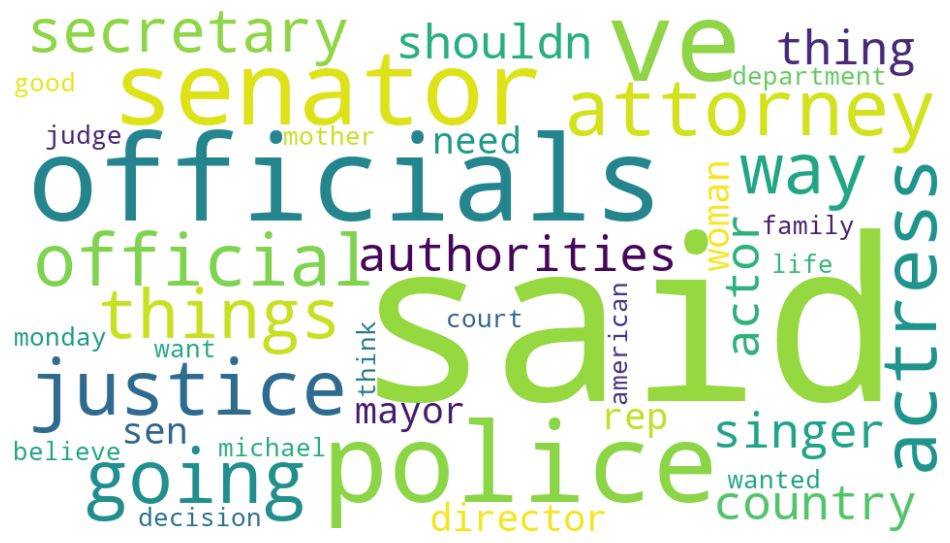

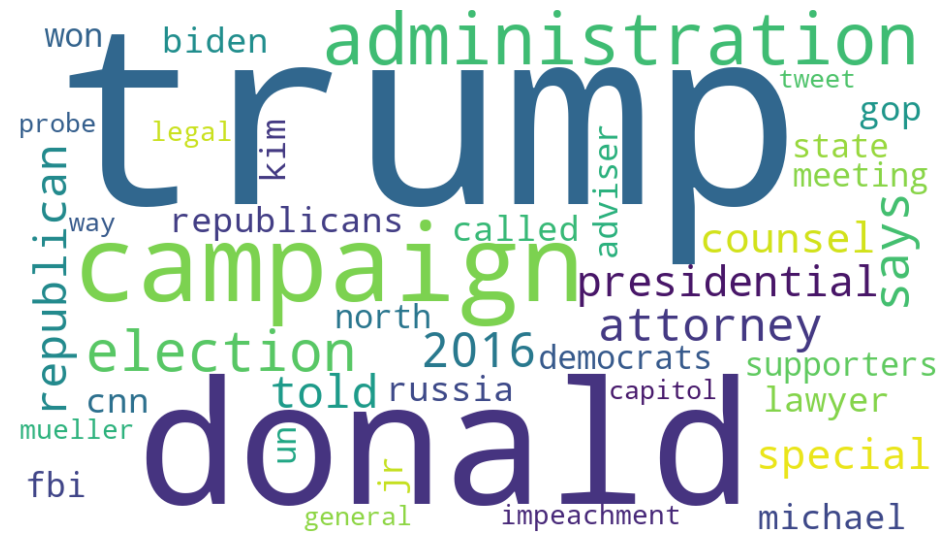

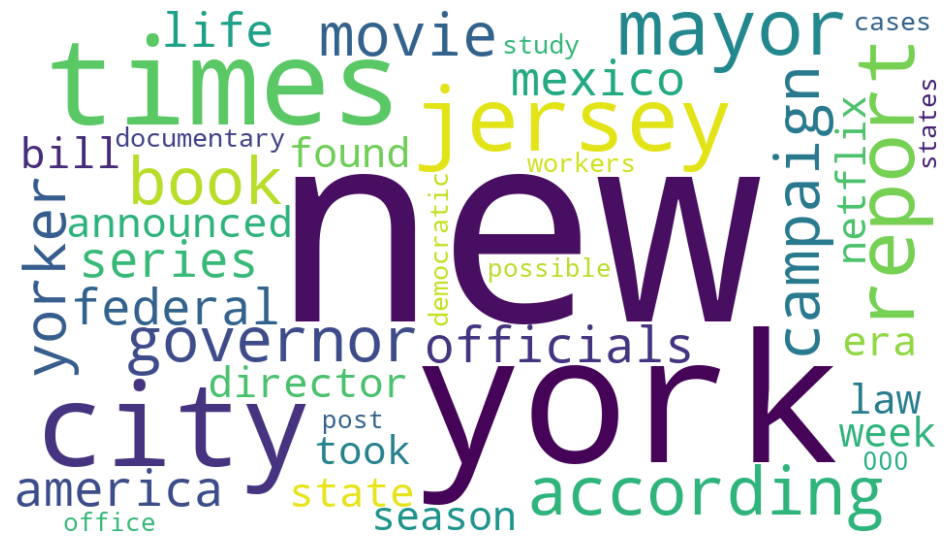

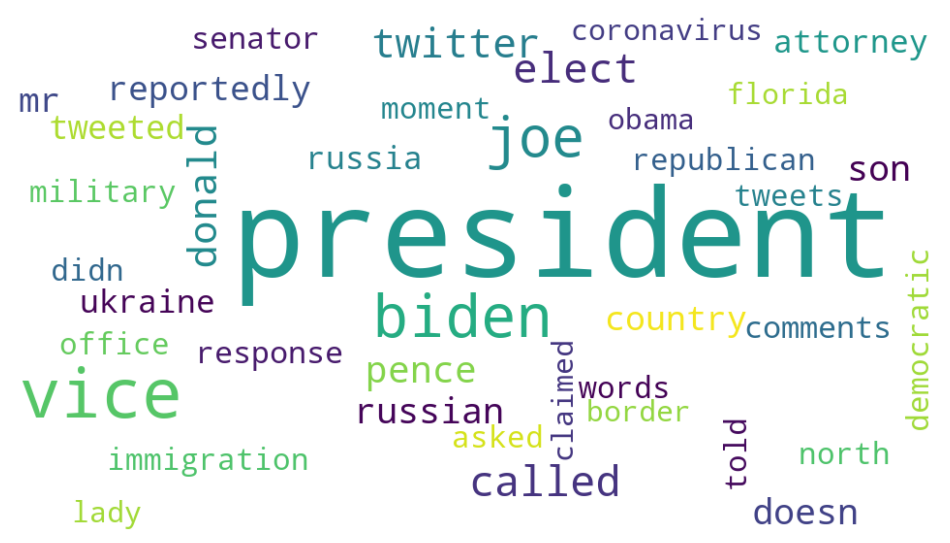

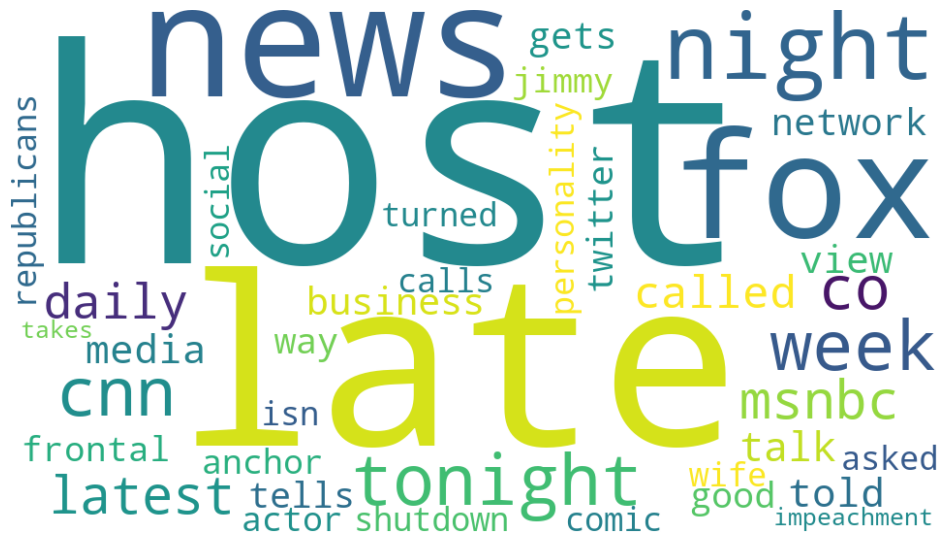

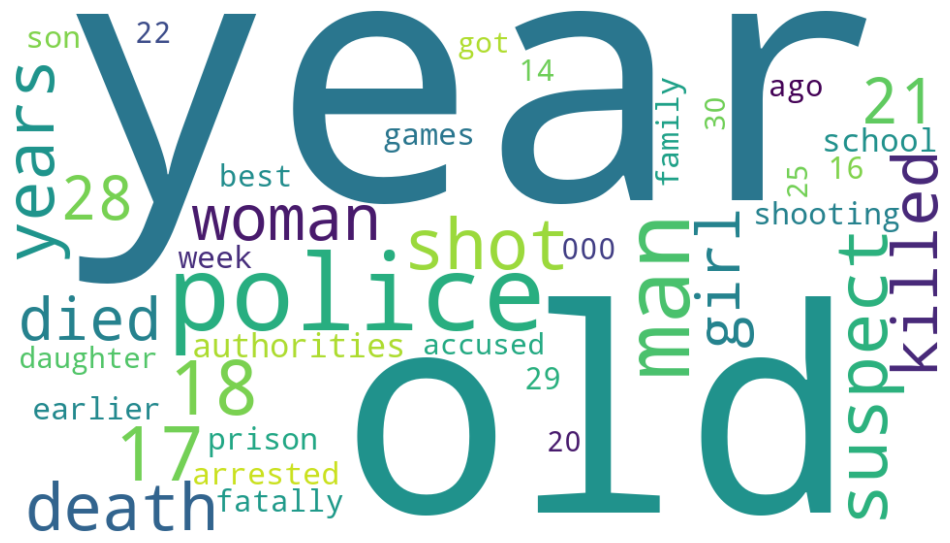

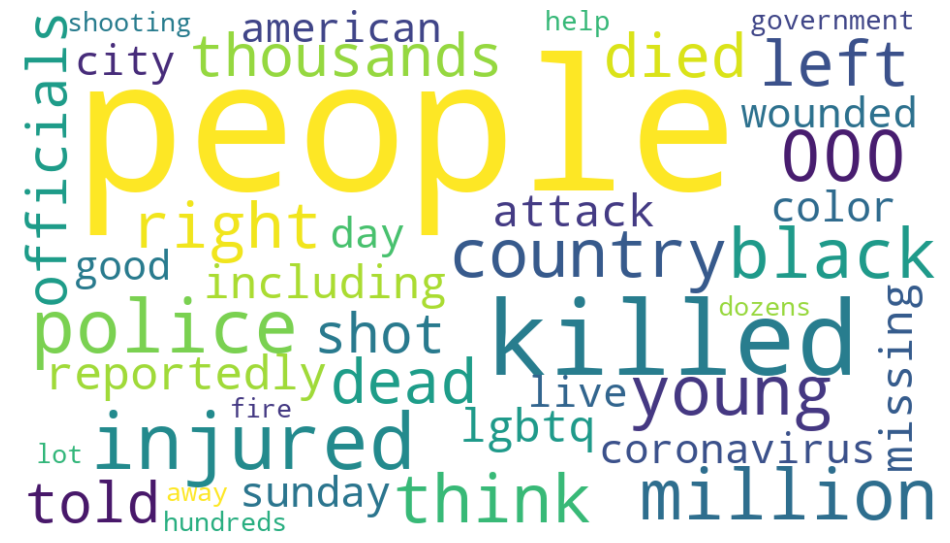

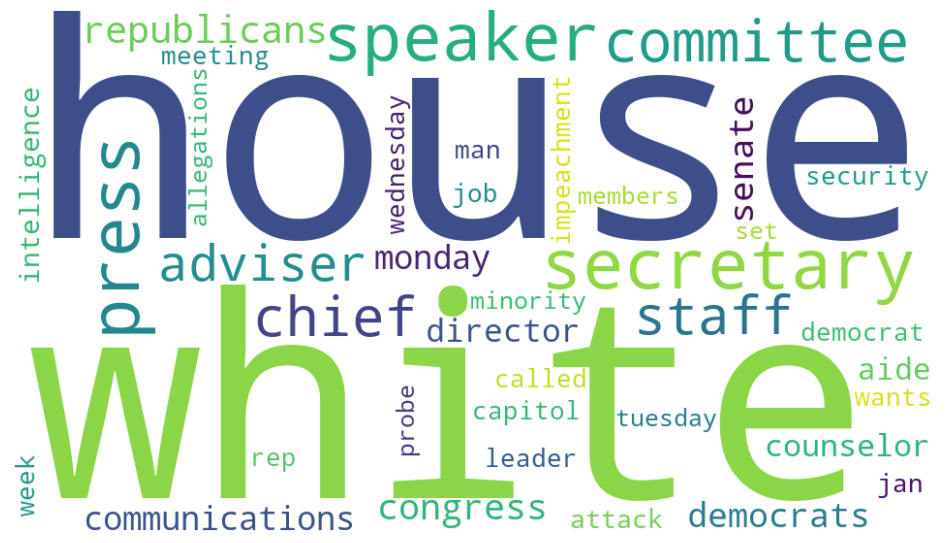

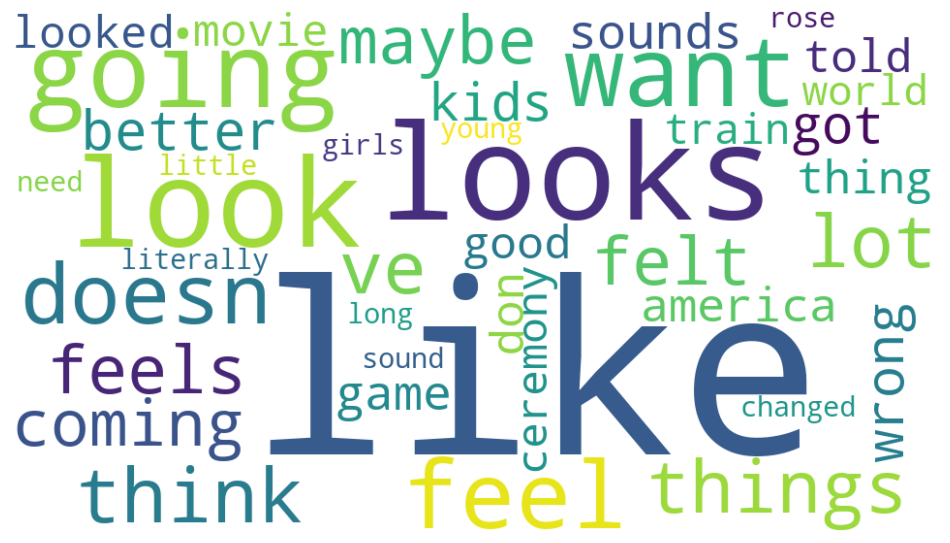

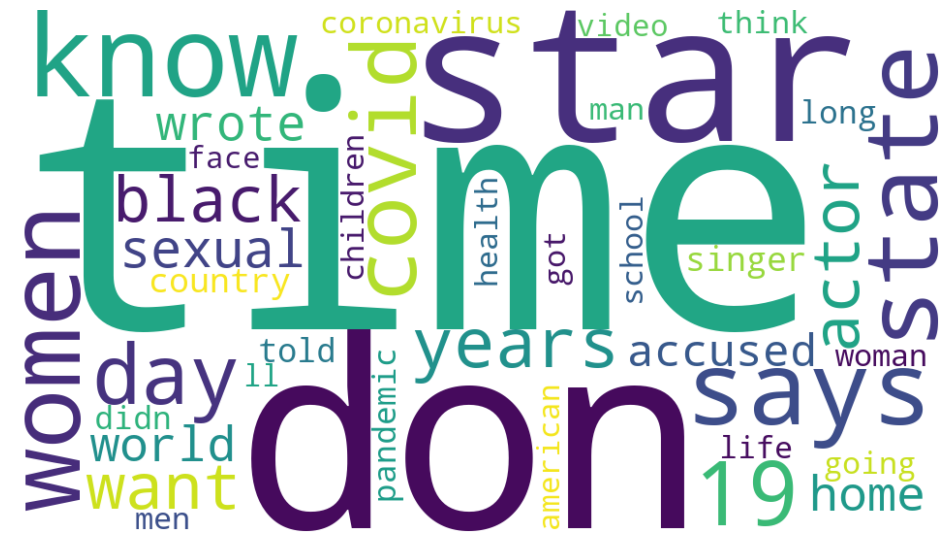

In [101]:
#iterates over each topic in the model, retrieves the top words and their frequencies, and generates a word cloud based
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

# WORDCLOUD FOR LDA MODEL

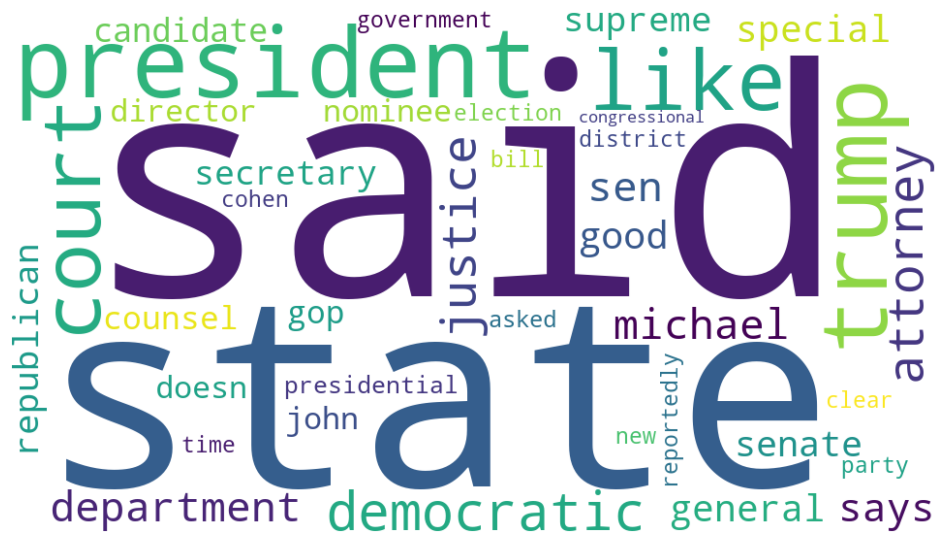

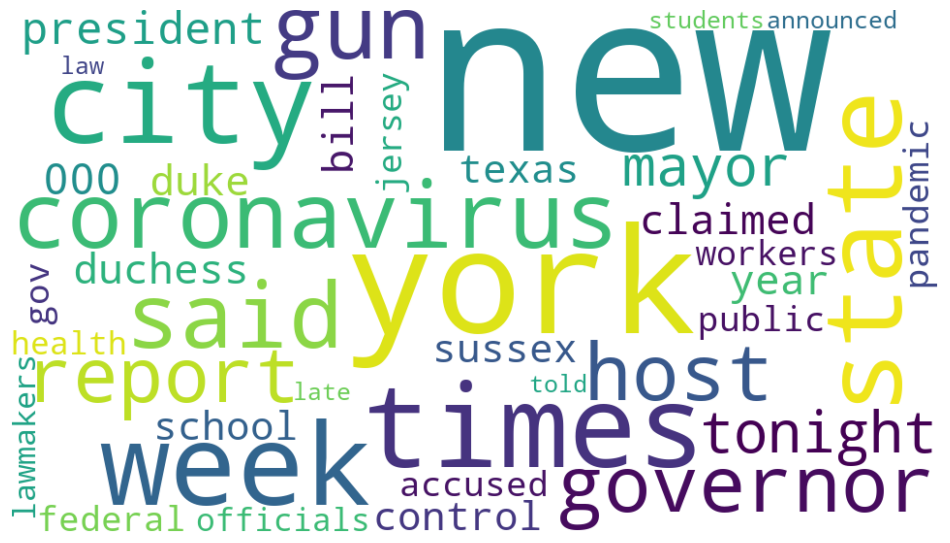

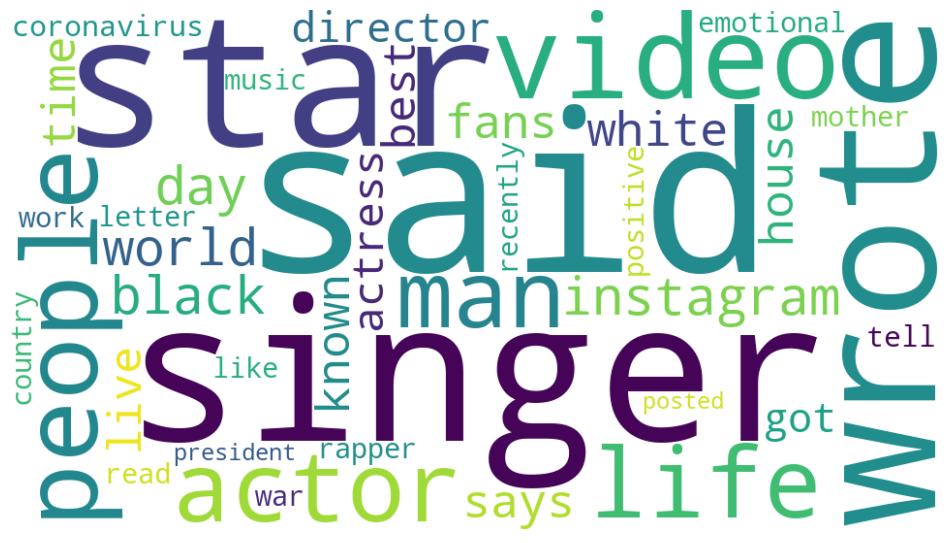

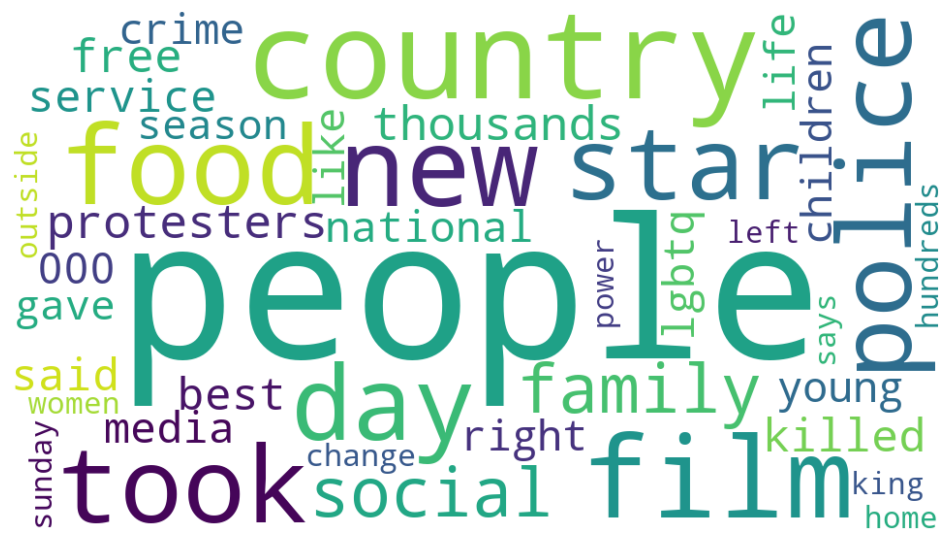

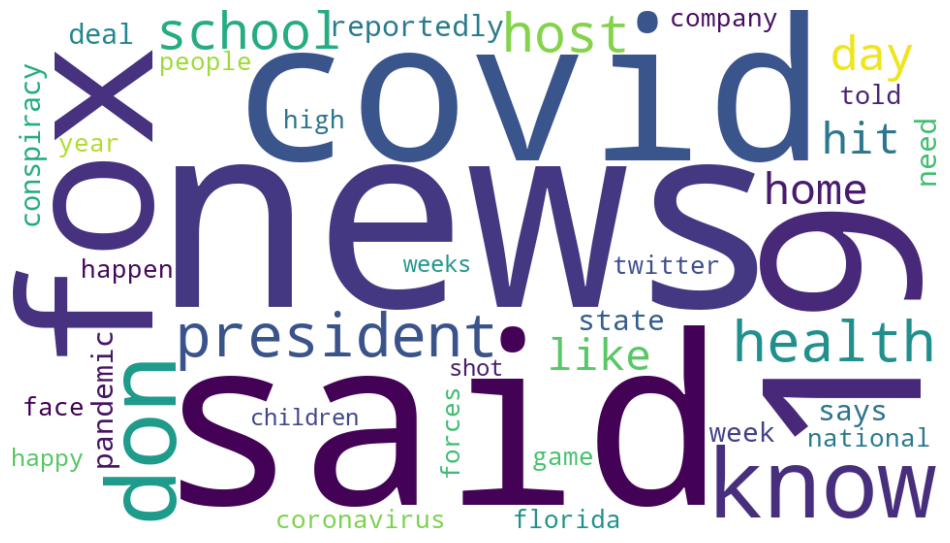

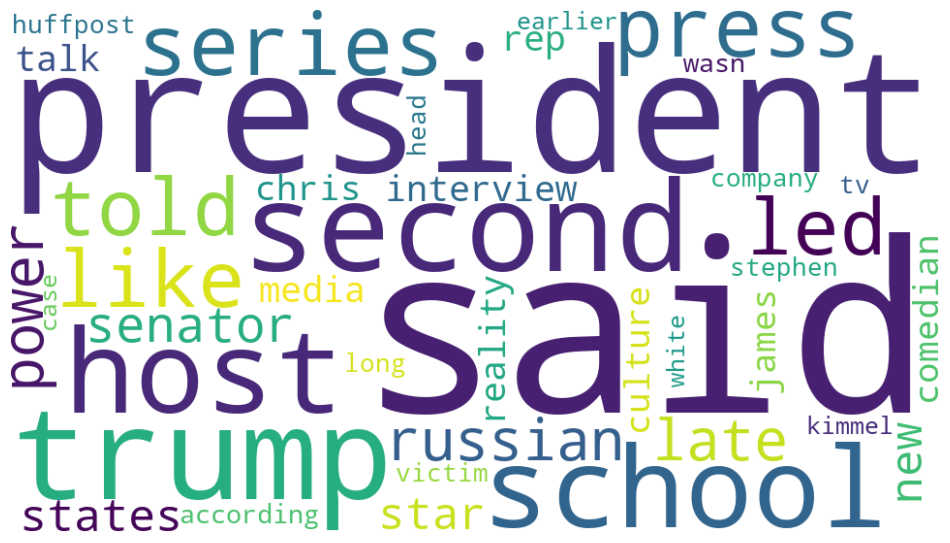

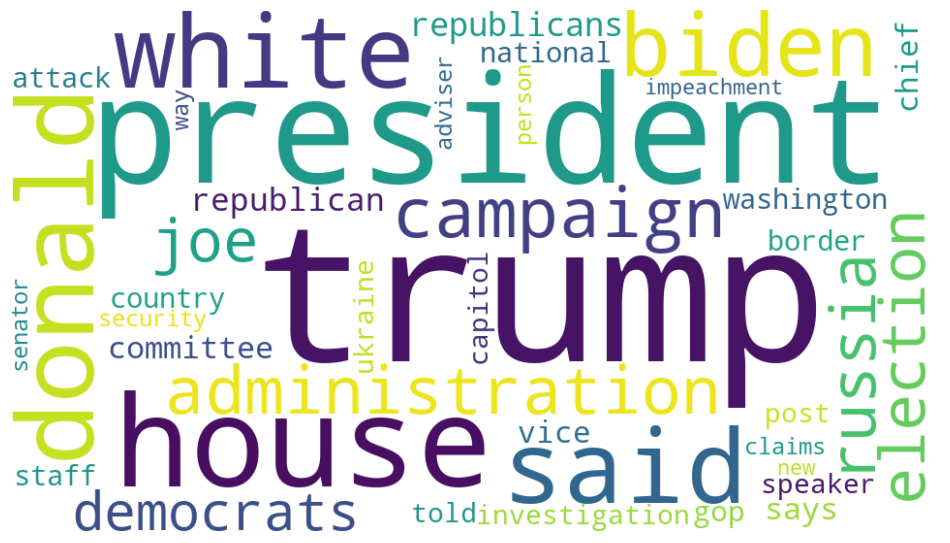

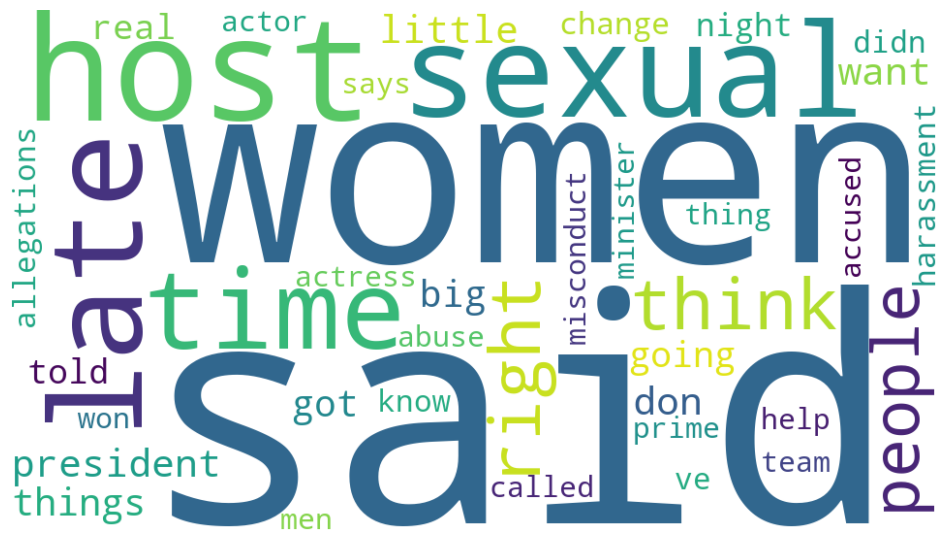

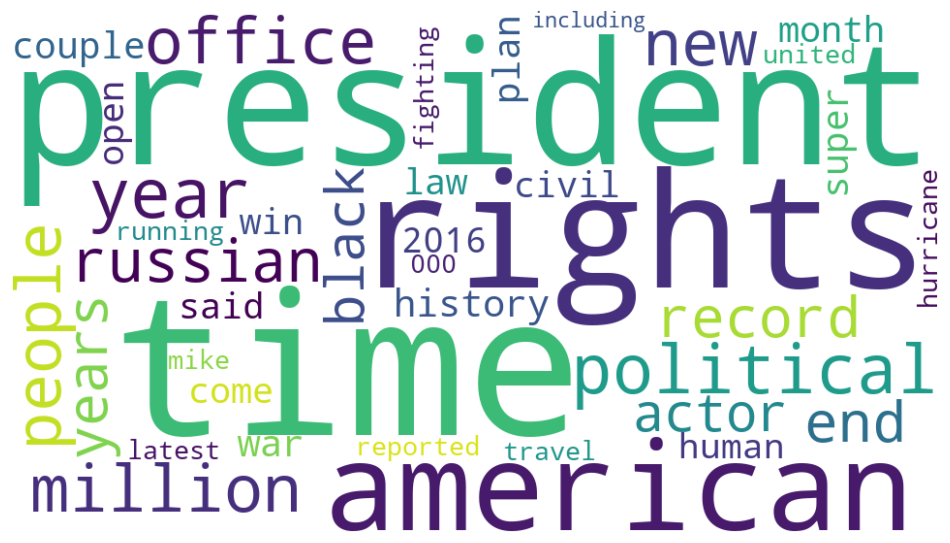

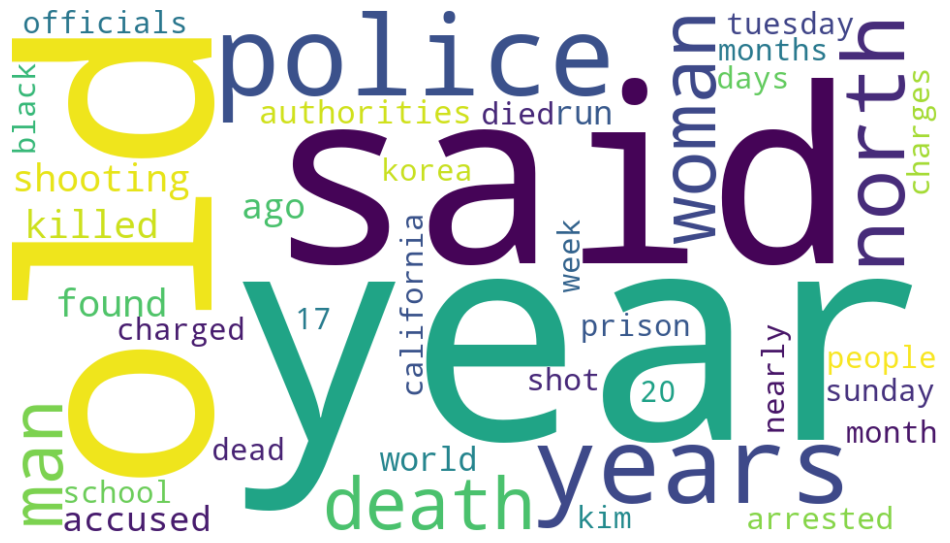

In [102]:
# Call the function with your LDA model and feature names
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

# GENERATING TOPIC NAMES

In [114]:
# generates topic names for topics in an NMF model based on their top words
from tqdm.auto import tqdm
import numpy as np
category_data = []
for category in tqdm(np.unique(np.unique(paragraph_news_articles["category"]))):
    W_category = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_news_articles["category"] == category)])
    category_data.append([category] + list(W_category.sum(axis=0)/W_category.sum()*100.0))

  0%|          | 0/36 [00:00<?, ?it/s]

# VISUALIZE TOPIC DISTRIBUTION OVER YEARS

  0%|          | 0/36 [00:00<?, ?it/s]

<Axes: xlabel='category'>

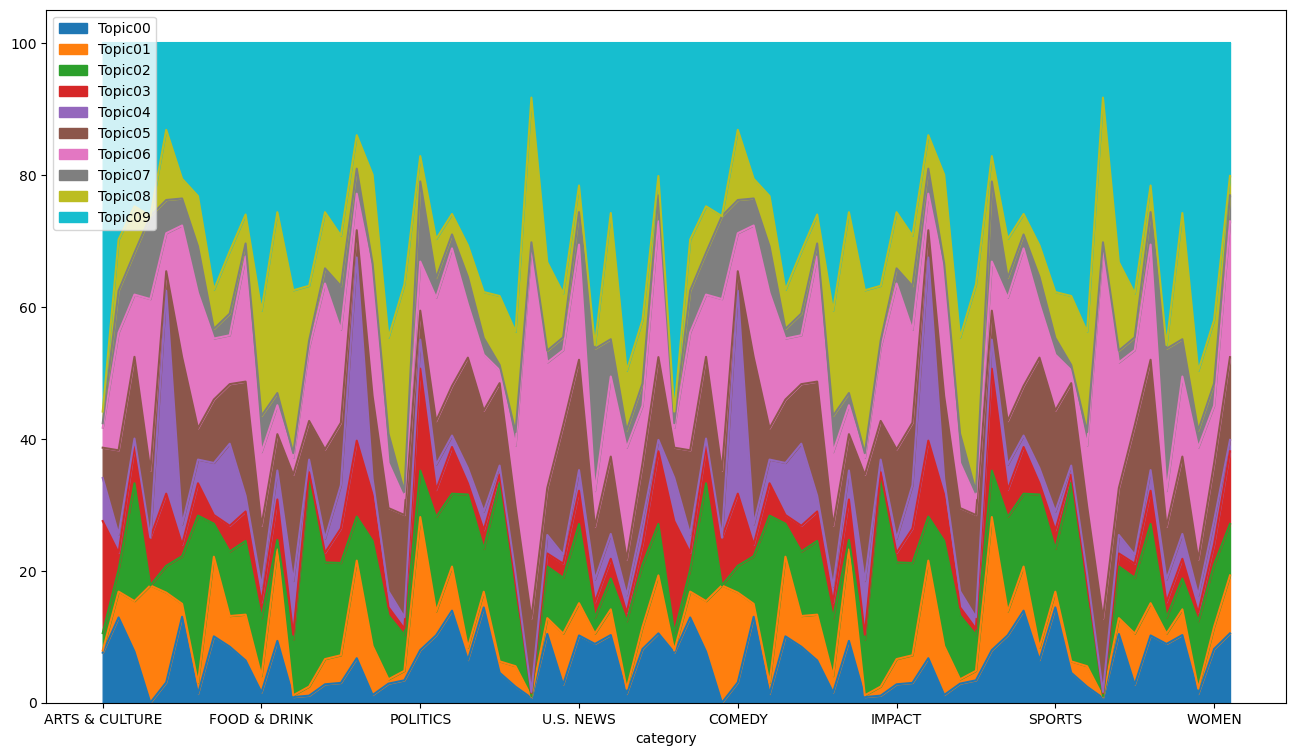

In [116]:
for category in tqdm(np.unique(np.unique(paragraph_news_articles["category"]))):
    W_category = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_news_articles["category"] == category)])
    category_data.append([category] + list(W_category.sum(axis=0)/W_category.sum()*100.0))
#imports matplotlib.pyplot as plt and uses it to visualize the distribution
import matplotlib.pyplot as plt
# Define topic_names as a list containing the names of topics
topic_names = ["Topic00", "Topic01", "Topic02", "Topic03", "Topic04", "Topic05", "Topic06", "Topic07", "Topic08", "Topic09"]  # Add your topic names here
df_category = pd.DataFrame(category_data, columns=["category"] + topic_names).set_index("category")
df_category.plot.area(figsize=(16,9))